<h1> Pre-Processing Operations and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_rows', 10)
%matplotlib inline
print("Setup complete.")

Setup complete.


<h2> Import the dataset

In [2]:
data = pd.read_csv('dataset.csv')
data

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,most_act_juin2021,total_act_juin2021,total_amt_juin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,2,33,5.0,Giao dich chuyen khoan,5.0,0.000016,14.0,Giao dich chuyen khoan,17.0,0.006543
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,2,5,NaN,NaN,NaN,NaN,1.0,Giao dich thanh toan,1.0,0.000062
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,2,7,4.0,Giao dich chuyen khoan,6.0,0.000046,1.0,Giao dich chuyen khoan,2.0,0.000071
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,3,24,9.0,Giao dich chuyen khoan,10.0,0.000170,17.0,Giao dich chuyen khoan,19.0,0.000575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,FEMALE,Single,1.0,6.0,178.0,1992.0,NaN,NaN,NaN,NaN,...,1,2,16.0,Giao dich chuyen khoan,18.0,0.000108,15.0,Giao dich chuyen khoan,16.0,0.000351
99996,MALE,Single,25.0,239.0,8689.0,2001.0,NaN,NaN,NaN,0.0,...,1,1,NaN,NaN,NaN,NaN,8.0,GIAO DICH PHI TAI CHINH,15.0,0.000116
99997,FEMALE,Married,31.0,316.0,11842.0,1987.0,NaN,NaN,NaN,NaN,...,2,4,5.0,Giao dich chuyen khoan,9.0,0.000436,2.0,Giao dich chuyen khoan,3.0,0.000170
99998,MALE,Single,1.0,271.0,9706.0,2002.0,NaN,NaN,NaN,NaN,...,1,1,29.0,Giao dich chuyen khoan,36.0,0.000090,12.0,Giao dich chuyen khoan,13.0,0.000143


<h2> New Feature: Target Attribution

We define Churn Customers as customers who do not have any transactions in March 2021 and June 2021. Based on this definition, we created the target column 'Is_churn' to label Churn Customer as '1' and Active Customer as '0'.

In [3]:
data["Is_churn"] = np.where(
   (data['total_amt_mar2021'].isna() == True) & (data['total_amt_juin2021'].isna() == True), 1, 0)

To handle the problem of building a Churn Customer forecasting model, we focused on analyzing the customer's performance over a period of 1 week, 1 month and 3 months from the last transaction of Churn Customers. In which, for the Null values ​​of the 3 columns 'amount_week', 'amount_month' and 'amount_3month', we consider Customers have no transaction in the period of 1 week, 1 month and those 3 months. Therefore, we removed these observations from the dataset.

In [4]:
data.dropna(axis = 0, subset = ['amount_week', 'amount_month', 'amount_3month'], inplace = True)

Observable features as of March 2021 and June 2021 only serve as reference data for the Target variable 'Is_churn'. Therefore, after creating the Target variable, we removed these features from the dataset.

In [5]:
data = data.drop(['most_act_mar2021_count', 'most_act_mar2021', 'total_act_mar2021', 'total_amt_mar2021',
           'most_act_juin2021_count', 'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021'], axis = 1)

In [6]:
data['Is_churn'].value_counts()

0    52303
1     2497
Name: Is_churn, dtype: int64

The dataset currently has 54.800 observations with 2497 Churn Customers and 52.303 Active Customers.

<h2> Create New Features

We've created features that represent the difference between the customer's largest and smallest transaction amount over the observed time periods.

In [7]:
data['diff_amount_week'] = data['max_amount_week'] - data['min_amount_week']
data['diff_amount_month'] = data['max_amount_month'] - data['min_amount_month']
data['diff_amount_3month'] = data['max_amount_3month'] - data['min_amount_3month']

In [8]:
print('Shape of dataset:', data.shape)

Shape of dataset: (54800, 31)


Thus, the current dataset has 31 features and 54,800 observations.

<h2> Handle Missing Values

We check the dataset which features have missing data and counted the missing data ​​of each feature.

In [9]:
missing_values_count_by_column = data.isnull().sum()
print('Missing columns:\n', missing_values_count_by_column[missing_values_count_by_column > 0])

Missing columns:
 local_ref_1          1651
vn_marital_status    1818
resid_province       3812
resid_district       3809
resid_wards          3809
birth_incorp_date       4
dtype: int64


<h3> Handle Missing values of 'birth_incorp_date' column

The data in the 'birth_incorp_date' feature is being represented as the customer's year of birth. We have converted these values ​​to the age of the customers at the time of observation to facilitate the analysis.

In [10]:
data['birth_incorp_date'] = 2020 - data[['birth_incorp_date']]

Let's look at the distribution of values ​​in the 'birth_incorp_date' feature using a distplot.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


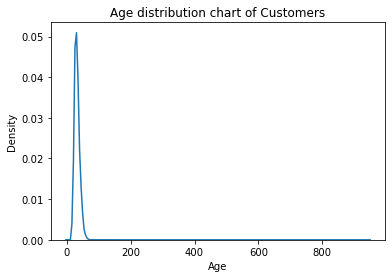

In [11]:
sns.distplot(data['birth_incorp_date'], hist = False)
plt.title('Age distribution chart of Customers')
plt.xlabel('Age')
plt.show()

Based on the chart above, we can see in this dataset, customers are aged from 0 to over 900 years old. We filtered the data from 6 to 100 years old for observations. For the remaining data that do not fall within this age range, we evaluate them as incorrect values.

We replaced 4 missing values ​​in the 'birth_incorp_date' feature with the average age of our customers.

In [12]:
# Create a dataframe of observations from 6-100 years old
data1 = data.loc[(data['birth_incorp_date'] < 101) & (data['birth_incorp_date'] > 5)]

# Calculate the average age of customers 
avg_age = data1['birth_incorp_date'].mean(axis=0)

# Replace missing values with mean
data['birth_incorp_date'].replace(np.nan, round(avg_age + 0.5), inplace = True)

# Filter out customers with age less than 6 and over 100 years old from the dataset
data = data.loc[(data['birth_incorp_date'] < 101) & (data['birth_incorp_date'] > 5)]

<h3> Handle Missing values of 'vn_marital_status' column

Based on practical knowledge, we found that there is a correlation between the age and marital status of customers. We have conducted to find marital status trends and replace missing values with that value according to different age groups of customers. After learning about demographics, we divided our customers into 5 main age groups:
- Group 1: Customers aged from 6 to 18 years old
- Group 2: Customers aged from 19 to 24 years old
- Group 3: Customers aged from 25 to 34 years old
- Group 4: Customers aged from 35 to 44 years old
- Group 5: Customers over 45 years old

In [13]:
# create impute_age_group function to group customer's age
def impute_age_group(col):
    birth_incorp_date = col[0]
    if birth_incorp_date < 19:
        return '6_18'
    if birth_incorp_date < 25:
        return '19_24'
    if birth_incorp_date < 35:
        return '25_34'
    if birth_incorp_date < 45:
        return '35_44'
    else:
        return 'Over 44'
    
# Create an 'age_group' feature that contains the customer's age group data
data['age_group'] = data[['birth_incorp_date']].apply(impute_age_group, axis = 1)

We found trends in marital status of customers in each age group by groupby.

In [14]:
# Create a variable to calculate the number of occurrences of the values in the 'vn_marital_status'.
data['test_column'] = 1

# Create a data_grtest consisting of observations of 3 features: 'vn_marital_status', 'age_group', 'test_column'
data_grtest = data[['vn_marital_status', 'age_group', 'test_column']]

# Create a dataframe showing frequency of the values in the 'vn_marital_status' appear by age group
group_test = data_grtest.groupby(['age_group', 'vn_marital_status'], as_index = False).sum()

# Create a function to find the value with the highest occurrence of each age group
def marital_status(age_group):
    sub_group = group_test[group_test['age_group'] == age_group]
    sub_group= sub_group[sub_group['test_column'] == sub_group['test_column'].max()]
    return sub_group.iloc[0]['vn_marital_status']

# Create a dictionary showing common marital status corresponding to each customer age group
Age_group = group_test['age_group'].unique().tolist()
my_dict = {age_group:marital_status(age_group) for age_group in Age_group}
my_dict

{'19_24': 'Single',
 '25_34': 'Single',
 '35_44': 'Married',
 '6_18': 'Single',
 'Over 44': 'Married'}

After finding out the common marital status of each age group, we proceed to replace them with Null values ​​corresponding to the customer's age group.

In [15]:
def impute_marrital_status(cols):
    vn_marital_status = cols[0]
    age_group = cols[1]
    if pd.isnull(vn_marital_status):
        if (age_group == '6_18') or (age_group == '19_24') or (age_group == '25_34'):
            return 'Single'
        else:
            return 'Married'
    else:
        return vn_marital_status

In [16]:
data['vn_marital_status'] = data[['vn_marital_status', 'age_group']].apply(impute_marrital_status, axis = 1)

<h3> Handle Missing values of 'local_ref_1' column

We have implemented the same handling of Missing values in the 'local_ref_1' as in the 'vn_marital_status'. We found a correlation between 3 attributions: gender, age and marital status of the customers. Therefore, we replaced the Missing values of the 'local_ref_1' with the values that appeared most frequently on the basis of the customer's age group and marital status.

In [17]:
pd.options.display.max_rows = 100
# Create data_grtest1 consisting observations of 4 features: 'local_ref_1', 'age_group', 'vn_marital_status', 'test_column'
data_grtest1 = data[['local_ref_1','vn_marital_status', 'age_group', 'test_column']]

# Create a dataframe showing the frequency of values' occurrence  in the 'local_ref_1' according to each age group's marital status
group_test1 = data_grtest1.groupby(['age_group', 'vn_marital_status', 'local_ref_1'], as_index = False).sum()

# Create a function to find the gender with the most occurrence of each marital status by age group
def impute_marital_status(cols):
    age_group = cols[0]
    marital_status = cols[1]
    sub_group1 = group_test1[(group_test1['age_group'] == age_group) & (group_test1['vn_marital_status'] == marital_status)]
    sub_group1 = sub_group1[sub_group1['test_column'] == sub_group1['test_column'].max()]
    return sub_group1.iloc[0]['local_ref_1']

# Create a dataframe showing the gender trend of the customers based on age group and marital status
sub_group2 = group_test[['age_group', 'vn_marital_status']]
sub_group2['sex'] = sub_group2[['age_group', 'vn_marital_status']].apply(impute_marital_status, axis = 1)
sub_group2

,age_group,vn_marital_status,sex
0,19_24,Married,MALE
1,19_24,Other,FEMALE
2,19_24,Partner,MALE
3,19_24,Single,MALE
4,25_34,Divorced,FEMALE
5,25_34,Married,MALE
6,25_34,Other,MALE
7,25_34,Partner,MALE
8,25_34,Seperated,FEMALE
9,25_34,Single,MALE


Based on the table above, we have replaced the Missing values of the 'local_ref_1' with the corresponding gender value.

In [18]:
def impute_sex(cols):
    sex = cols[0]
    age_group = cols[1]
    vn_marital_status = cols[2]
    if pd.isnull(sex):
        if (age_group == '6_18') or (age_group == '35_44'):
            return 'MALE'
        if age_group == '19_24':
            if vn_marital_status == 'Other':
                return 'FEMALE'
            else:
                return 'MALE'
        if age_group == '25_34':
            if (vn_marital_status == 'Divorced') or (vn_marital_status == 'Seperated') or (vn_marital_status == 'Widow'):
                return 'FEMALE'
            else:
                return 'MALE'
        else:
            if (vn_marital_status == 'Divorced') or (vn_marital_status == 'Seperated'):
                return 'FEMALE'
            else:
                return 'MALE'
    else:
        return sex

In [19]:
data['local_ref_1'] = data[['local_ref_1', 'age_group', 'vn_marital_status']].apply(impute_sex, axis = 1)

<h3> Handle Missing values of 'resid_province' column

We replace the missing values in the customer's live city feature with the value that occurs most often.

In [20]:
# Find the value with the highest frequency in the 'resid_province'
frequency = data['resid_province'].value_counts().idxmax()

# Replace NaN values with frequency
data['resid_province'].replace(np.nan, frequency, inplace = True)

'resid_district' and 'resid_wards' do not contain much information useful for analysis. Therefore, we removed these 2 features from the dataset.

In [21]:
data.drop(['resid_district', 'resid_wards', 'age_group', 'test_column'], axis = 1, inplace = True)

<h2> Handle Outliers

During our analysis, we found that most of the features in the dataset contain Outliers values. Moreover, the number of Outliers is very large. We assessed that these Outliers are likely to be actual customer data, not subjective errors in the data entry process. Therefore, we dealt with the Outliers by 2 main methods: Capping and Binning.

<h3> Handle Outliers by Capping

We will determine the Outliers, low_lim and up_lim limits of each feature using the IQR method. Then we will process those Outliers using the Capping method:
- If the Outliers value is greater than up_lim, we replace those Outliers with up_lim
- If Outliers value is less than low_lim, we will replace those Outliers with low_lim

We will apply the Capping method to handle the Outliers of the following 17 features:
- ‘max_amount_week’
- ‘min_amount_week’
- ‘diff_amount_week’
- ‘count_payment_code_week’
- ‘distinct_ref_no_week’
- ‘amount_month’
- ‘max_amount_month’
- ‘min_amount_month’
- ‘diff_amount_month’
- ‘count_payment_code_month’
- ‘distinct_ref_no_month’
- ‘amount_3month’
- ‘max_amount_3month’
- ‘min_amount_3month’
- ‘diff_amount_3month’
- ‘count_payment_code_3month’
-  ‘distinct_ref_no_3month’

In [22]:
# Create a function to find up_lim of the feature need to be processed
def up_lim(column):
    Q1 = np.percentile(column, 25, interpolation = 'midpoint')
    Q3 = np.percentile(column, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    return up_lim

# Create a function to find low_lim of the feature need to be processed
def low_lim(column):
    Q1 = np.percentile(column, 25, interpolation = 'midpoint')
    Q3 = np.percentile(column, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    return low_lim

# Create a handle_outliers_by_capping function to handle Outliers using the Capping method
def handle_outliers_by_capping(cols):
    column_value = cols[0]
    low_lim = cols[1]
    up_lim = cols[2]
    if column_value < low_lim:
        return low_lim
    if column_value > up_lim:
        return up_lim
    else:
        return column_value

<h5> Handle Outliers in 'max_amount_week' column

In [23]:
data['low_lim'] = low_lim(data['max_amount_week'])
data['up_lim'] = up_lim(data['max_amount_week'])
data['max_amount_week'] = data[['max_amount_week', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)

<h5> Handle Outliers in 'min_amount_week' column

In [24]:
data['low_lim'] = low_lim(data['min_amount_week'])
data['up_lim'] = up_lim(data['min_amount_week'])
data['min_amount_week'] = data[['min_amount_week', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)

<h5> Handle Outliers in 'diff_amount_week' column

In [25]:
data['low_lim'] = low_lim(data['diff_amount_week'])
data['up_lim'] = up_lim(data['diff_amount_week'])
data['diff_amount_week'] = data[['diff_amount_week', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)

<h5> Handle Outliers in 'count_payment_code_week' column

In [26]:
data['low_lim'] = low_lim(data['count_payment_code_week'])
data['up_lim'] = up_lim(data['count_payment_code_week'])
data['count_payment_code_week'] = data[['count_payment_code_week', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, 
                                                                                               axis = 1)

<h5> Handle Outliers in 'distinct_ref_no_week' column

In [27]:
data['low_lim'] = low_lim(data['distinct_ref_no_week'])
data['up_lim'] = up_lim(data['distinct_ref_no_week'])
data['distinct_ref_no_week'] = data[['distinct_ref_no_week', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, 
                                                                                               axis = 1)

<h5> Handle Outliers in 'amount_month' column

In [28]:
data['low_lim'] = low_lim(data['amount_month'])
data['up_lim'] = up_lim(data['amount_month'])
data['amount_month'] = data[['amount_month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)


<h5> Handle Outliers in 'max_amount_month' column

In [29]:
data['low_lim'] = low_lim(data['max_amount_month'])
data['up_lim'] = up_lim(data['max_amount_month'])
data['max_amount_month'] = data[['max_amount_month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)

<h5> Handle Outliers in 'min_amount_month' column

In [30]:
data['low_lim'] = low_lim(data['min_amount_month'])
data['up_lim'] = up_lim(data['min_amount_month'])
data['min_amount_month'] = data[['min_amount_month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)

<h5> Handle Outliers in 'diff_amount_month' column

In [31]:
data['low_lim'] = low_lim(data['diff_amount_month'])
data['up_lim'] = up_lim(data['diff_amount_month'])
data['diff_amount_month'] = data[['diff_amount_month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)

<h5> Handle Outliers in 'count_payment_code_month' column

In [32]:
data['low_lim'] = low_lim(data['count_payment_code_month'])
data['up_lim'] = up_lim(data['count_payment_code_month'])
data['count_payment_code_month'] = data[['count_payment_code_month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, 
                                                                                                 axis = 1)

<h5> Handle Outliers in 'distinct_ref_no_month' column

In [33]:
data['low_lim'] = low_lim(data['distinct_ref_no_month'])
data['up_lim'] = up_lim(data['distinct_ref_no_month'])
data['distinct_ref_no_month'] = data[['distinct_ref_no_month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, 
                                                                                            axis = 1)

<h5> Handle Outliers in 'amount_3month' column

In [34]:
data['low_lim'] = low_lim(data['amount_3month'])
data['up_lim'] = up_lim(data['amount_3month'])
data['amount_3month'] = data[['amount_3month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)

<h5> Handle Outliers in 'max_amount_3month' column

In [35]:
data['low_lim'] = low_lim(data['max_amount_3month'])
data['up_lim'] = up_lim(data['max_amount_3month'])
data['max_amount_3month'] = data[['max_amount_3month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)

<h5> Handle Outliers in 'min_amount_3month' column

In [36]:
data['low_lim'] = low_lim(data['min_amount_3month'])
data['up_lim'] = up_lim(data['min_amount_3month'])
data['min_amount_3month'] = data[['min_amount_3month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)

<h5> Handle Outliers in 'diff_amount_3month' column

In [37]:
data['low_lim'] = low_lim(data['diff_amount_3month'])
data['up_lim'] = up_lim(data['diff_amount_3month'])
data['diff_amount_3month'] = data[['diff_amount_3month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, axis = 1)

<h5> Handle Outliers in 'count_payment_code_3month' column

In [38]:
data['low_lim'] = low_lim(data['count_payment_code_3month'])
data['up_lim'] = up_lim(data['count_payment_code_3month'])
data['count_payment_code_3month'] = data[['count_payment_code_3month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, 
                                                                                                   axis = 1)

<h5> Handle Outliers in 'distinct_ref_no_3month' column

In [39]:
data['low_lim'] = low_lim(data['distinct_ref_no_3month'])
data['up_lim'] = up_lim(data['distinct_ref_no_3month'])
data['distinct_ref_no_3month'] = data[['distinct_ref_no_3month', 'low_lim', 'up_lim']].apply(handle_outliers_by_capping, 
                                                                                                   axis = 1)

After processing Outliers of 17 features using Capping method, we will delete the generated 2 features 'low_lim' and 'up_lim' from the dataset.

In [40]:
data.drop(['low_lim', 'up_lim'], axis = 1, inplace = True)

<h3> Handle Outliers by Binning

For the Binning method, we will conduct grouping suitable for each feature of view.

We will apply the Binning method to handle the Outliers of the following features:
- ‘birth_incorp_date’
- ‘distinct_payment_code_week’
- ‘distinct_trans_group_week’
- ‘distinct_payment_code_month’
- ‘distinct_trans_group_month’
- ‘distinct_payment_code_3month’
- ‘distinct_trans_group_3month’

<h5> Handle Outliers in 'birth_incorp_date' column

<AxesSubplot:ylabel='birth_incorp_date'>

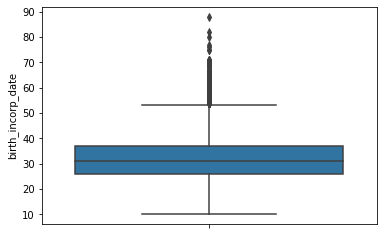

In [41]:
sns.boxplot(y = 'birth_incorp_date',data=data)

After assessing the psychology and consumer behavior of customers by age, we have divided the customers into 4 age groups:
- Group 1: Customers aged from 6 to 17 years old
- Group 2: Customers aged from 18 to 34 years old
- Group 3: Customers aged from 35 to 55 years old
- Group 4: Customers over 55 years old

In [42]:
# Create a function to group age groups
def impute_age_group(col):
    birth_incorp_date = col[0]
    if birth_incorp_date < 18:
        return '6-17'
    if birth_incorp_date < 35:
        return '18-34'
    if birth_incorp_date < 56:
        return '35-55'
    else:
        return 'Over 55'

# Group the customer's age group in the 'birth_incorp_date' feature using the impute_age_group function
data['birth_incorp_date'] = data[['birth_incorp_date']].apply(impute_age_group, axis = 1)

In [43]:
data['birth_incorp_date'].value_counts()

18-34      35435
35-55      18286
Over 55      546
6-17         523
Name: birth_incorp_date, dtype: int64

<h5> Handle Outliers in 'distinct_payment_code_week' column

<AxesSubplot:ylabel='distinct_payment_code_week'>

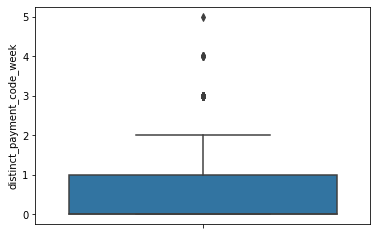

In [44]:
sns.boxplot(y = 'distinct_payment_code_week',data=data)

Based on the assessment of the amount of usage of each type of service, we have divided 6 types of services used in 1 week into 3 main service groups:
- Group 1: includes service type 0
- Group 2: includes service type 1
- Group 3: including the rest of the bank's services

In [45]:
# Create a function to group services
def impute_payment_code_group(col):
    distinct_payment_code_week = col[0]
    if distinct_payment_code_week < 2:
        return distinct_payment_code_week
    else:
        return 'Other'

# Group service type in 'distinct_payment_code_week' using impute_payment_code_group function
data['distinct_payment_code_week'] = data[['distinct_payment_code_week']].apply(impute_payment_code_group, axis = 1)

In [46]:
data['distinct_payment_code_week'].value_counts()

0.0      37035
1.0      16482
Other     1273
Name: distinct_payment_code_week, dtype: int64

<h5> Handle Outliers in 'distinct_trans_group_week' column

<AxesSubplot:ylabel='distinct_trans_group_week'>

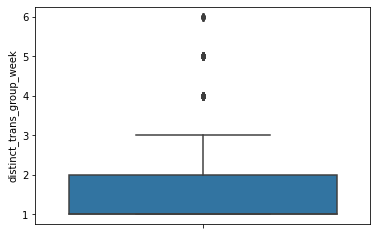

In [47]:
sns.boxplot(y = 'distinct_trans_group_week', data=data)

Based on the distribution of usage volume of each transaction group, we have divided 6 transaction groups into 3 main transaction groups for analysis:
- Group 1: including transaction group 1
- Group 2: including transaction group 2
- Group 3: including the remaining 4 transaction groups of the bank (transaction groups 3, 4, 5, 6)

In [48]:
# Create a function to group of bank transactions
def impute_trans_group_week(col):
    distinct_trans_group_week = col[0]
    if distinct_trans_group_week < 3:
        return distinct_trans_group_week
    else:
        return 'Other'

# Group the transaction types in the 'distinct_trans_group_week' feature using the impute_trans_group_week function
data['distinct_trans_group_week'] = data[['distinct_trans_group_week']].apply(impute_trans_group_week, axis = 1)

In [49]:
data['distinct_trans_group_week'].value_counts()

1.0      32842
2.0      17100
Other     4848
Name: distinct_trans_group_week, dtype: int64

<h5> Handle Outliers in 'distinct_payment_code_month' column

<AxesSubplot:ylabel='distinct_payment_code_month'>

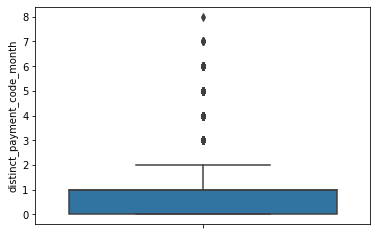

In [50]:
sns.boxplot(y='distinct_payment_code_month',data=data)

During the previous 1-month period, there were 9 types of services used by customers. We also divide these types of services into 3 main groups:
- Group 1: includes service type 0
- Group 2: includes service type 1
- Group 3: including the rest of the bank's services

In [51]:
data['distinct_payment_code_month'] = data[['distinct_payment_code_month']].apply(impute_payment_code_group, axis = 1)

In [52]:
data['distinct_payment_code_month'].value_counts()

1.0      24868
0.0      19940
Other     9982
Name: distinct_payment_code_month, dtype: int64

<h5> Handle Outliers in 'distinct_trans_group_month' column

<AxesSubplot:ylabel='distinct_trans_group_month'>

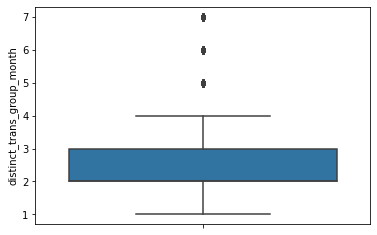

In [53]:
sns.boxplot(y='distinct_trans_group_month',data=data)

We divide the customer's previous 1 month transaction groups into 4 main groups:
- Group 1: including transaction group 1
- Group 2: including transaction group 2
- Group 3: including transaction group 3
- Group 4: including the remaining transaction groups of the bank

In [54]:
# Create a function to group of transactions
def impute_trans_group_month(col):
    distinct_trans_group_month = col[0]
    if distinct_trans_group_month < 4:
        return distinct_trans_group_month
    else:
        return 'Other'
    
# Group groups of transactions in the 'distinct_trans_group_month' using the impute_trans_group_month function
data['distinct_trans_group_month'] = data[['distinct_trans_group_month']].apply(impute_trans_group_month, axis = 1)

In [55]:
data['distinct_trans_group_month'].value_counts()

2.0      24747
3.0      12473
1.0      11569
Other     6001
Name: distinct_trans_group_month, dtype: int64

<h5> Handle Outliers in 'distinct_payment_code_3month' column

<AxesSubplot:ylabel='distinct_payment_code_3month'>

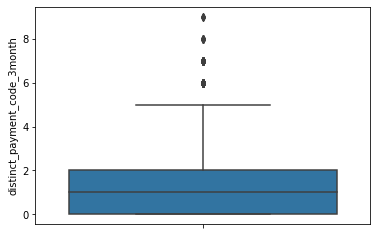

In [56]:
sns.boxplot(y = 'distinct_payment_code_3month',data=data)

During the previous 3 months, there were 10 types of services used by customers. We have divided into 4 main service groups:
- Group 1: includes service type 0
- Group 2: includes service type 1
- Group 3: includes service type 2
- Group 4: including the rest of the bank's services

In [57]:
# Create a function to group services
def impute_payment_code_3month(col):
    distinct_payment_code_3month = col[0]
    if distinct_payment_code_3month < 3:
        return distinct_payment_code_3month
    else:
        return 'Other'
    
# Group the transaction types in the 'distinct_payment_code_3month' using the impute_payment_code_3month function
data['distinct_payment_code_3month'] = data[['distinct_payment_code_3month']].apply(impute_payment_code_3month, 
                                                                                    axis = 1)

In [58]:
data['distinct_payment_code_3month'].value_counts()

1        26206
0        13934
2         8290
Other     6360
Name: distinct_payment_code_3month, dtype: int64

<h5> Handle Outliers in 'distinct_trans_group_3month' column

<AxesSubplot:ylabel='distinct_trans_group_3month'>

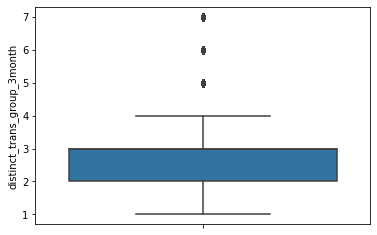

In [59]:
sns.boxplot(y='distinct_trans_group_3month',data=data)

We have divided 7 groups of transactions used by customers in the previous 3 months into 5 main groups:
- Group 1: including transaction group 1
- Group 2: including transaction group 2
- Group 3: including transaction group 3
- Group 4: including transaction group 4
- Group 5: including the remaining transaction groups of the bank

In [60]:
# Create a function to group of bank transactions
def impute_trans_group_3month(col):
    distinct_trans_group_3month = col[0]
    if distinct_trans_group_3month < 5:
        return distinct_trans_group_3month
    else:
        return 'Other'
    
# Group of transactions in the 'distinct_trans_group_3month' using the impute_trans_group_3month function
data['distinct_trans_group_3month'] = data[['distinct_trans_group_3month']].apply(impute_trans_group_3month, axis = 1)

In [61]:
data['distinct_trans_group_3month'].value_counts()

3        23593
2        13764
4         9126
Other     4447
1         3860
Name: distinct_trans_group_3month, dtype: int64

<h2> Visualization

After processing the Outliers, we visualized the data of the features to make an assessment of the distribution between Churn Customer and Active Customer and found the insights of Churn Customer.

For each data type, we will visualize using different charts. Therefore, we created 2 different lists that include the names of the features:
- List 1 - 'numerical_columns'
- List 2 - 'categorical_columns'

In [62]:
numerical_columns = []
categorical_columns = []
for column in data.columns:
    if data[column].dtype == 'O':
        categorical_columns.append(column)
    else:
        if column != 'Is_churn':
            numerical_columns.append(column)

We have divided the dataset into 2 classes:
- data_churn: the dataset containing the observations as churn customer
- data_active: the dataset containing the observations as active customer

In [63]:
data_churn = data[data['Is_churn'] == 1]
data_active = data[data['Is_churn'] == 0]

We have created a function to visualize all the fields in the numerical_columns list using KDE plots.

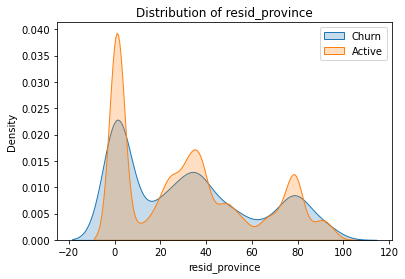

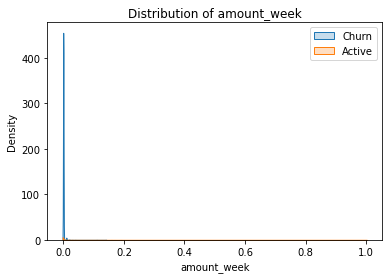

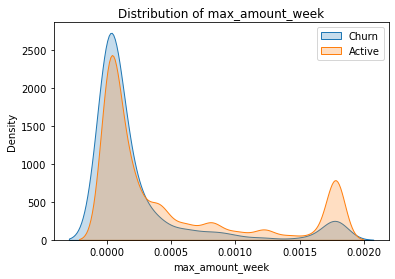

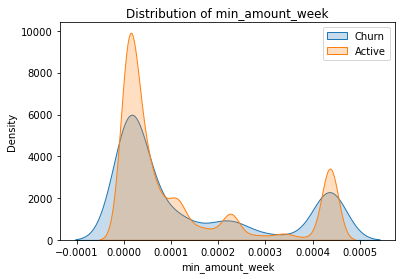

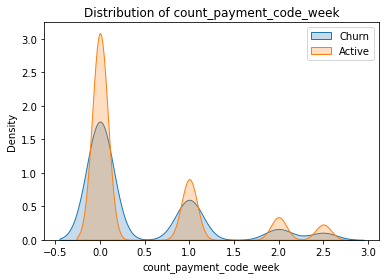

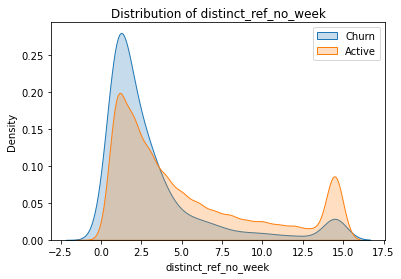

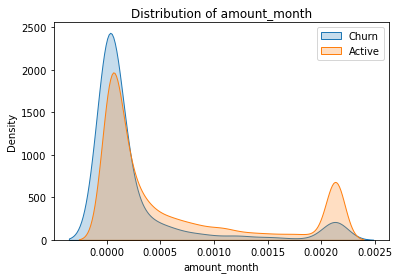

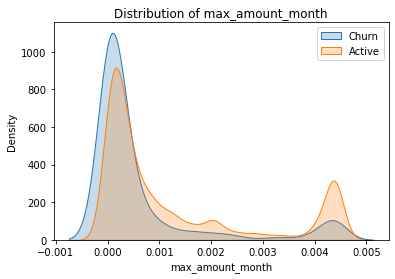

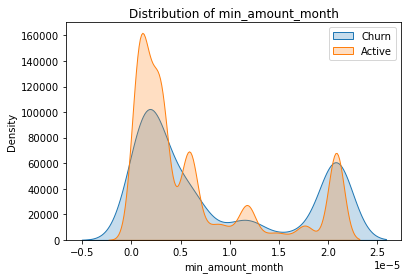

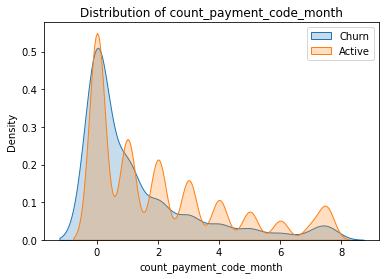

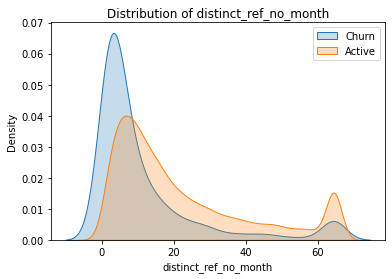

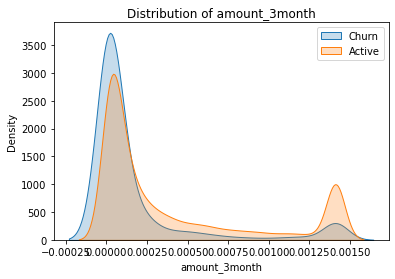

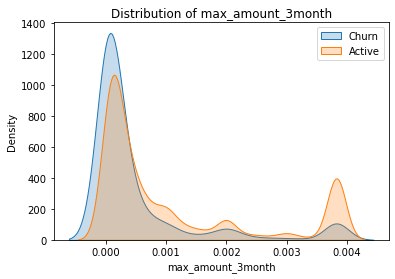

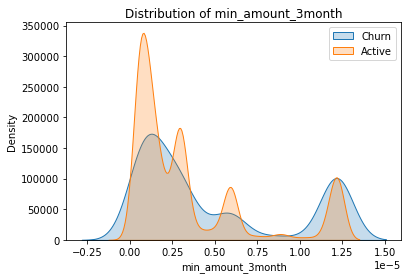

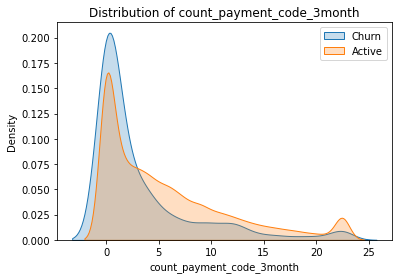

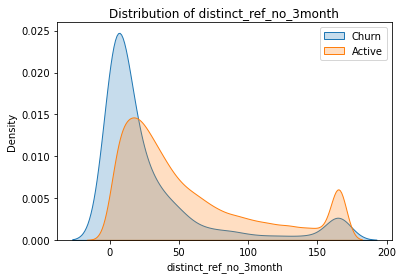

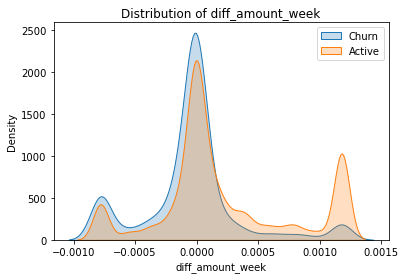

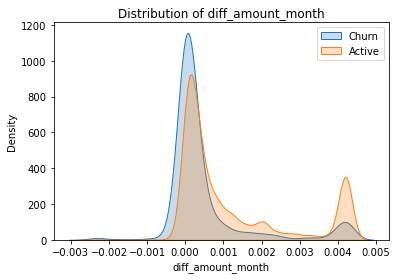

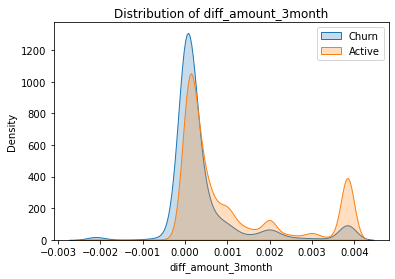

In [64]:
def KDEPlots(df1,df2,label1,label2,column):
    plt.figure()
    sns.kdeplot(data=df1,label=label1, shade=True)
    sns.kdeplot(data=df2,label=label2,shade=True)
    plt.legend()
    plt.title("Distribution of " +column)
    return

for column in numerical_columns:
    KDEPlots(data_churn[column],data_active[column],'Churn','Active',column)

Based on the above distribution charts, we have come up with some insights about Churn Customer as follows:
- Churn Customers are located mainly in the province 1
- The lower a customer's total transaction amount in the 1-month, 3-month period before the customer leaves the bank, the more likely the customer is to become a Churn Customer.
- The lower the value of the customer's largest transaction in the 3 observation periods (1 week, 1 month, 3 months ago), the more likely the customer is to become a Churn Customer.
- The smaller the difference between the customer's largest transaction and the customer's smallest transaction in the three observation time periods, the more likely the customer is to become a Churn Customer.
- The less service the customer used in the three observation periods, the more likely the customer is to become a Churn Customer.
- The smaller the number of recipients of a customer's transactions, the more likely the customer is to become a Churn Customer.

We continue to create a function to visualize categorical features using a BarPlots chart.

The below charts show that: with all observations are Churn Customer, how the percentage of each value in each categorical column is; and same for all observations is Active Customer.

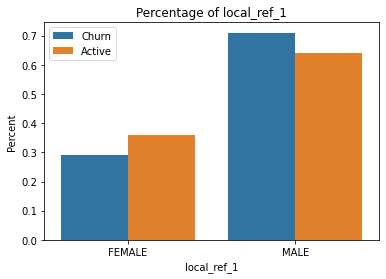

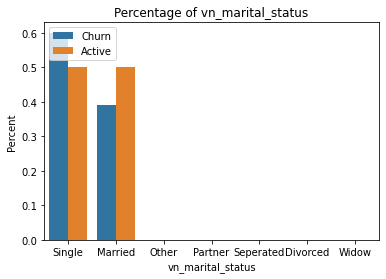

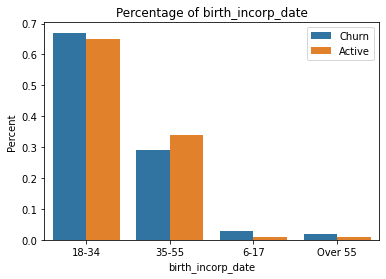

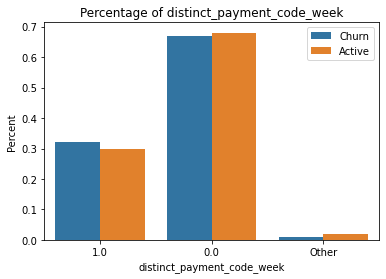

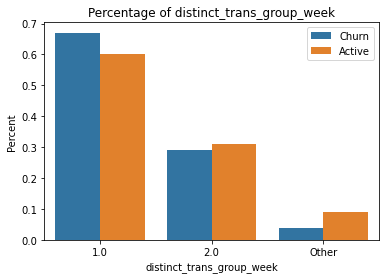

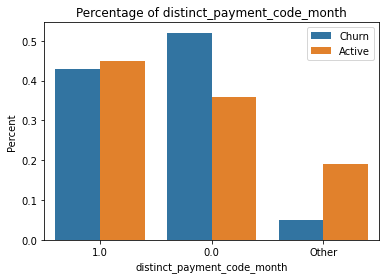

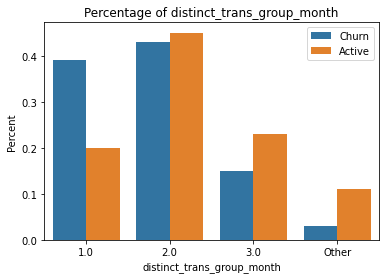

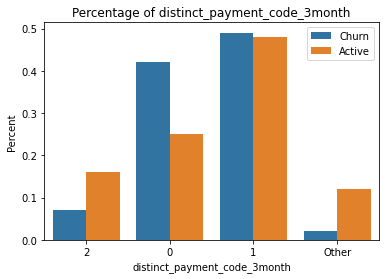

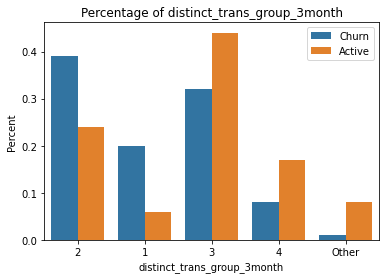

In [65]:
def barplot(column_name):
    # Create a dataframe 'churn' containing values of each categorical column and percentage of each value , whose observations is just Churn customers
    column_churn = data_churn[column_name].unique().tolist()
    percent_churn = []
    Is_churn_1 = ['Churn']*len(column_churn)
    for i in column_churn:
        a = data_churn[data_churn[column_name]==i][column_name].count()/data_churn[column_name].count()
        percent_churn.append(round(a,2))
    churn = pd.DataFrame(list(zip(Is_churn_1, column_churn, percent_churn)), columns=['Is_churn','Column','Percent'])
    
    # Create a dataframe 'active' containing values of each categorical column and percentage of each value, whose observations is just Active customers
    column_active = data_active[column_name].unique().tolist()
    percent_active = []
    Is_churn_0 = ['Active']*len(column_active)
    for j in column_active:
        b = data_active[data_active[column_name]==j][column_name].count()/data_active[column_name].count()
        percent_active.append(round(b,2))
    active = pd.DataFrame(list(zip(Is_churn_0, column_active, percent_active)), columns=['Is_churn','Column','Percent'])
    
    # Create a dataframe 'data2' by concatting 'churn' and 'active' dataframe
    data2 = pd.concat([churn, active],axis=0)
    
    # Visualize data2 by barplot
    sns.barplot(x='Column', y='Percent', hue='Is_churn', data=data2)
    plt.title("Percentage of " + column_name)
    plt.xlabel(column_name)
    plt.legend()
    plt.show()
    return

for column in categorical_columns:
    barplot(column)

Based on the above distribution charts, we have made some comments about Churn Customer as follows:
- With the customer group being Churn Customer, Male customer are the majority with more than 70% of Churn Customers.
- While Active Customers who are single or married are evenly distributed (nearly 50% for each ones), Churn Customer who are single counts for the majority (with approximately 60% of all Churn Customers).
- Nearly 70% of Churn Customers are between the ages of 18 and 34.
- Churn Customers tend to use two payment codes 0 and 1, especially payment code 0 in the period of 1 week, 1 month, 3 months before leaving the bank.
- Churn Customers tend to use transaction group 1 in the previous week; or use transaction groups 1 or 2 in the previous 1 month; or use transaction groups 1, 2, 3 within 3 months before leaving the bank.

<h2> Normalization

In [66]:
data.describe()

,resid_province,amount_week,max_amount_week,min_amount_week,count_payment_code_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,count_payment_code_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,count_payment_code_3month,distinct_ref_no_3month,Is_churn,diff_amount_week,diff_amount_month,diff_amount_3month
count,54790.000000,54790.00000,5.479000e+04,54790.000000,54790.000000,54790.000000,5.479000e+04,5.479000e+04,54790.000000,54790.000000,54790.000000,5.479000e+04,5.479000e+04,5.479000e+04,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000
mean,32.401643,0.00059,4.760065e-04,0.000122,0.472851,5.115094,5.914523e-04,1.228400e-03,0.000006,2.013068,21.111015,3.893395e-04,1.075430e-03,3.549816e-06,5.511453,54.553888,0.045556,0.000202,0.001177,0.001059
std,29.001154,0.00615,6.227605e-04,0.000153,0.764433,4.443873,7.547197e-04,1.525788e-03,0.000007,2.264628,18.700828,4.957798e-04,1.337041e-03,3.769087e-06,6.042546,48.718725,0.208522,0.000543,0.001489,0.001347
min,0.000000,0.00000,2.040000e-09,0.000000,0.000000,0.000000,2.800000e-10,2.040000e-09,0.000000,0.000000,0.000000,6.570000e-11,1.000000e-09,0.000000e+00,0.000000,0.000000,0.000000,-0.000783,-0.002339,-0.002137
25%,1.000000,0.00000,3.060000e-05,0.000011,0.000000,2.000000,4.980000e-05,1.378060e-04,0.000001,0.000000,7.000000,3.360000e-05,1.160000e-04,6.090000e-07,0.000000,18.000000,0.000000,-0.000047,0.000120,0.000103
50%,31.000000,0.00000,1.551020e-04,0.000045,0.000000,3.000000,1.905340e-04,4.081630e-04,0.000003,1.000000,14.000000,1.272535e-04,4.000000e-04,1.770000e-06,4.000000,37.000000,0.000000,0.000027,0.000407,0.000394
75%,51.000000,0.00000,7.297960e-04,0.000182,1.000000,7.000000,8.831660e-04,1.836735e-03,0.000009,3.000000,30.000000,5.851687e-04,1.600000e-03,5.260000e-06,9.000000,77.000000,0.000000,0.000444,0.001760,0.001596
max,96.000000,1.00000,1.778590e-03,0.000437,2.500000,14.500000,2.133215e-03,4.385052e-03,0.000021,7.500000,64.500000,1.412331e-03,3.826000e-03,1.223650e-05,22.500000,165.500000,1.000000,0.001181,0.004219,0.003837


Looking at the table above, we see that the values of the numerical features are not balanced. Therefore, we continue to normalize this dataset to improve the quality of the construction model. 
- For categorical data features, we will normalize using the Dummy variable method.
- For numerical fields, we will apply Min-Max Normalization.

<h3> Dummy Variable

In [67]:
prefix = ['sex', 'marital_status', 'age', 'payment_code_week', 'trans_group_week', 'payment_code_month', 
         'trans_group_month', 'payment_code_3month', 'trans_group_3month']

data = pd.get_dummies(data = data, prefix = prefix, prefix_sep = '_', 
                      columns = categorical_columns, drop_first = False, dtype = 'int')

<h3> Min-Max Normalization

In [68]:
from sklearn.preprocessing import MinMaxScaler
print('Setup MinMaxScaler Complete')

Setup MinMaxScaler Complete


In [69]:
# Create 1 MinMaxScaler object
norm = MinMaxScaler()

# Fit the model and transform the data
data_scaler = norm.fit_transform(data[numerical_columns])

# Convert data_scaler from an array to a dataframe
data_scaler = pd.DataFrame(data_scaler, columns = numerical_columns)

# Drop numerical columns without being normalized from data and reset the index
data = data.drop(numerical_columns, axis = 1).reset_index(drop=True)

# Concat data_scaler and data to have a dataframe with all normalized columns
data = pd.concat([data, data_scaler], axis = 1)

# Check the dataset
data.describe()

,Is_churn,sex_FEMALE,sex_MALE,marital_status_Divorced,marital_status_Married,marital_status_Other,marital_status_Partner,marital_status_Seperated,marital_status_Single,marital_status_Widow,...,count_payment_code_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,count_payment_code_3month,distinct_ref_no_3month,diff_amount_week,diff_amount_month,diff_amount_3month
count,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,...,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000
mean,0.045556,0.353787,0.646213,0.000329,0.490892,0.003979,0.000456,0.000055,0.504253,0.000037,...,0.268409,0.327303,0.275671,0.281084,0.290101,0.244953,0.329631,0.501547,0.536124,0.534984
std,0.208522,0.478148,0.478148,0.018123,0.499922,0.062953,0.021356,0.007399,0.499986,0.006042,...,0.301950,0.289935,0.351036,0.349462,0.308020,0.268558,0.294373,0.276525,0.227027,0.225529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.108527,0.023790,0.030319,0.049769,0.000000,0.108761,0.375000,0.375000,0.374999
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.133333,0.217054,0.090102,0.104548,0.144649,0.177778,0.223565,0.412475,0.418705,0.423719
75%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.400000,0.465116,0.414328,0.418191,0.429861,0.400000,0.465257,0.625000,0.625012,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2> Predictor Selection

In [70]:
from scipy import stats
print('Setup Complete.')

Setup Complete.


We continue to select predictors variables to build predictive models. We will analyze the correlation of the features with the target variable 'Is_churn' and selected the features with the highest correlation index to build the model.

In [71]:
corr = data.corr()
corr['Is_churn'].sort_values()

distinct_ref_no_3month      -0.111258
distinct_ref_no_month       -0.110730
diff_amount_3month          -0.101335
diff_amount_week            -0.099806
diff_amount_month           -0.099315
amount_3month               -0.093126
distinct_ref_no_week        -0.092334
amount_month                -0.091895
max_amount_3month           -0.091602
max_amount_month            -0.086161
max_amount_week             -0.079971
count_payment_code_3month   -0.079773
payment_code_month_Other    -0.074318
count_payment_code_month    -0.067064
payment_code_3month_Other   -0.064962
trans_group_month_Other     -0.058403
trans_group_3month_Other    -0.057240
trans_group_3month_4        -0.052797
payment_code_3month_2       -0.051211
trans_group_3month_3        -0.050873
marital_status_Married      -0.042418
trans_group_month_3.0       -0.040333
trans_group_week_Other      -0.039097
sex_FEMALE                  -0.030398
payment_code_week_Other     -0.020331
age_35-55                   -0.018754
amount_week 

Based on the above data, we initially selected 11 variables with corr > 0.09 or corr < -0.09 as predictors. We retested the significance of these correlations using the P-value index.

In [72]:
predictors = ['distinct_ref_no_3month', 'distinct_ref_no_month', 'trans_group_3month_1', 'diff_amount_3month',
              'diff_amount_week', 'diff_amount_month', 'trans_group_month_1.0', 'amount_3month', 
              'distinct_ref_no_week','amount_month', 'max_amount_3month']
P_values = []
for i in predictors:
    pearson_coef, p_value = stats.pearsonr(data[i], data['Is_churn'])
    P_values.append(p_value)
P_values

[1.9931790157162314e-150,
 5.181560041967457e-149,
 9.590803113555227e-158,
 5.325451515574425e-125,
 2.6787426765183777e-121,
 4.044818517905089e-120,
 1.595233240238524e-110,
 8.609948157806502e-106,
 5.0426803002158404e-104,
 4.73756489664431e-103,
 2.092811980434715e-102]

We see that the P-values of these variables are all asymptotes to 0. Therefore, we conclude that the correlation between these 9 fields and the target field 'Is_churn' is significant. Those are the following features:
- <h5> distinct_ref_no_3month
- <h5> distinct_ref_no_month
- <h5> trans_group_3month_1
- <h5> diff_amount_3month
- <h5> diff_amount_week
- <h5> diff_amount_month
- <h5> trans_group_month_1.0
- <h5> amount_3month
- <h5> distinct_ref_no_week
- <h5> amount_month
- <h5> max_amount_3month

<h1> Predictive Model

<h2> Train Test Split

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
print('Setup Complete.')

Setup Complete.


We splitted the dataset into training data and testing data, in which testing data accounts for 20% the dataset. To avoid some risks after splitting the dataset, especially with imbalanced ones, we splitted it based on the ratio of two values '0' and '1' of the target attribution 'Is_churn'.

In [74]:
data_train, data_test = train_test_split(data, test_size = 0.2, stratify = data['Is_churn'], random_state = 999)

In [75]:
data_train['Is_churn'].value_counts()

0    41835
1     1997
Name: Is_churn, dtype: int64

In [76]:
data_test['Is_churn'].value_counts()

0    10459
1      499
Name: Is_churn, dtype: int64

<h2> Handle Imbalanced data

In [77]:
from imblearn.over_sampling import RandomOverSampler
print('Setup Complete.')

Setup Complete.


<AxesSubplot:xlabel='Is_churn', ylabel='count'>

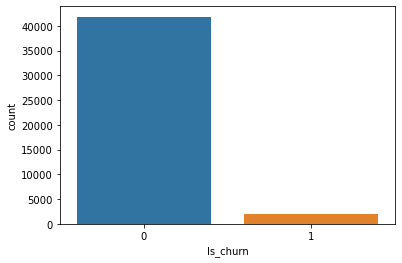

In [78]:
# We visualized the target attribution of training data 
sns.countplot(x = 'Is_churn', data = data_train)

We found that this dataset is severely imbalanced. We decided to deal with this problem before building the model. We chose OverSampling Data to make the dataset being balanced. There are many ways to OverSampling Data, we tried running model based on 3 main ways, including: Random Oversampling (ROS), OverSampling with shrinkage and Oversampling by SMOTE. Then, we realized ROS is most effective with this dataset. Thus, we chose Random Oversampling method.

In [79]:
# Create a RandomOverSampler object
ros = RandomOverSampler(random_state = 999)

# Create variables x, y 
x = data_train.drop('Is_churn', axis = 1)
y = data_train['Is_churn']

# Fit x, y to model and put it in new variables x_resampled, y_resampled
x_resampled, y_resampled = ros.fit_resample(x, y)

<AxesSubplot:xlabel='Is_churn', ylabel='count'>

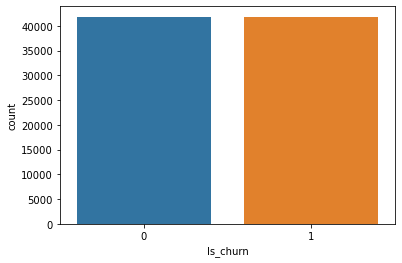

In [80]:
# Concat x_resampled, y_resampled to make a balanced training data
data_train = pd.concat([x_resampled, y_resampled], axis = 1)

# Recheck the distribution of target attribution in the training data
sns.countplot(x = 'Is_churn', data = data_train)

<h2> Build and Evaluate Model

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print('Setup Complete.')

Setup Complete.


We used 4 main algorithms to solve Classification problem, including:
- K-Nearest Neighbors
- Logistic Regression
- Naive Bayes
- Support Vector Machines

We built model based on the above 4 algorithms and evaluated model by 3 metrics: F1-score, Accuracy, AUC. Those parameters of model in this report is the result after being tried many times and run GridSearch to find the best_parameters.

In [82]:
# Create a list containing all predictors being chose in EDA
predictors = ['distinct_ref_no_3month', 'distinct_ref_no_month', 'trans_group_3month_1', 'diff_amount_3month',
              'diff_amount_week', 'diff_amount_month', 'trans_group_month_1.0', 'amount_3month', 
              'distinct_ref_no_week','amount_month', 'max_amount_3month']

# Create a list containing evaluating scores of 4 models
model_evaluation = []

In [83]:
def run_model(model, i, z):
    x_train = data_train[predictors]
    y_train = data_train['Is_churn']
    x_test = data_test[predictors]
    y_test = data_test['Is_churn']

    poly = PolynomialFeatures(degree = i)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    
    model.fit(x_train_poly, y_train)
    y_pred = model.predict(x_test_poly)

    if z == 'score':
        return model_evaluation.append([round(f1_score(y_test, y_pred),2), round(accuracy_score(y_test, y_pred),2), 
                                      round(roc_auc_score(y_test, y_pred),2)])
    else:
        return plot_confusion_matrix(model, x_test_poly, y_test)

In [84]:
# Create a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p=2, algorithm = 'brute')

# Create a LogisticRegression object
lr = LogisticRegression(max_iter = 5000, C = 1000)

# Create a GaussianNB object
nb = GaussianNB()

# Create a SVC object
svm = SVC(kernel='rbf')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix in SVC model')

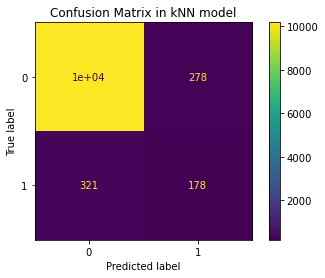

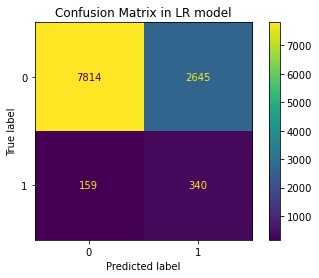

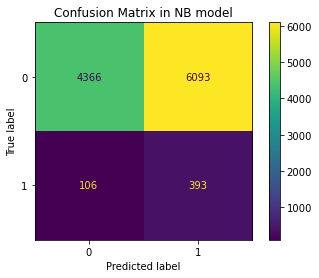

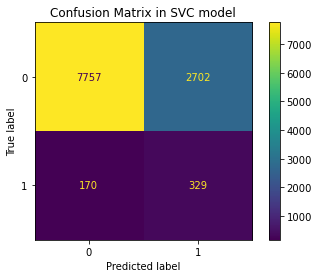

In [85]:
# Confusion matrix in kNN model
run_model(knn, 3, 'confusion_matrix')
plt.title("Confusion Matrix in kNN model")

# Confusion matrix in LR model
run_model(lr, 4, 'confusion_matrix')
plt.title("Confusion Matrix in LR model")

# Confusion matrix in NB model
run_model(nb, 1, 'confusion_matrix')
plt.title("Confusion Matrix in NB model")

# Confusion matrix in SVC model
run_model(svm, 1, 'confusion_matrix')
plt.title("Confusion Matrix in SVC model")

In [86]:
# Evaluate models
run_model(knn, 3, 'score')
run_model(lr, 4, 'score')
run_model(nb, 1, 'score')
run_model(svm, 1, 'score')

# Create a dataframe 'model_evaluation' to compare 4 models
model_evaluation = pd.DataFrame(model_evaluation, columns = ['F1-score', 'Accuracy', 'AUC'])
model_evaluation['Model'] = ['K-Nearest Neighbors', 'Logistic Regression', 'Naive Bayes', 'Support Vector Machines']
model_evaluation = model_evaluation[['Model', 'F1-score', 'Accuracy', 'AUC']]
model_evaluation

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,F1-score,Accuracy,AUC
0,K-Nearest Neighbors,0.37,0.95,0.67
1,Logistic Regression,0.20,0.74,0.71
2,Naive Bayes,0.11,0.43,0.60
3,Support Vector Machines,0.19,0.74,0.70


The above table contains 3 metrics of each model after evaluating on the testing data. Based on this table, we found that kNN model is the most effective model. Thus, we chose K-Nearest Neighbors to build predictive model of Churn Customer.

<h1> Conclusion

In this project, we have transformed the raw data into usefull data; besides, we have analyzed and built Churn Customer predictive model in the bank. After evaluating models, we chose K-Nearest Neghbors as the most efficient and optimal model for this dataset. Moreover, we found out some insights and behaviors of Churn Customers as follows:
- The lower a customer's total transaction amount in the 1-month, 3-month period before the customer leaves the bank, the more likely the customer is to become a Churn Customer.
- The lower the value of the customer's largest transaction in the 3 observation periods (1 week, 1 month, 3 months ago), the more likely the customer is to become a Churn Customer.
- The smaller the difference between the customer's largest transaction and the customer's smallest transaction in the three observation time periods, the more likely the customer is to become a Churn Customer.
- The less service the customer used in the three observation periods, the more likely the customer is to become a Churn Customer.
- The smaller the number of recipients of a customer's transactions, the more likely the customer is to become a Churn Customer.
- Churn Customers tend to being male, single and between the ages of 18 and 34.
- Churn Customers tend to use two payment codes 0 and 1, especially payment code 0 in the period of 1 week, 1 month, 3 months before leaving the bank.
- Churn Customers tend to use transaction group 1 in the previous week; or use transaction groups 1 or 2 in the previous 1 month; or use transaction groups 1, 2, 3 within 3 months before leaving the bank.
